In [1]:
import pandas as pd

In [3]:
# Read the data
df = pd.read_csv('../data/plant_butter/raw_regression.csv')
df.head()

,R,G,B,y
0,255,149,77,1.0
1,255,168,63,1.0
2,255,167,77,0.9
3,253,169,83,0.9
4,255,170,90,0.8


In [4]:
df_x = df.drop('y', axis=1)
df_y = df['y']

In [5]:
# Normalize
def normalize(df):
    std = df.std()
    mean = df.mean()
    df = (df - mean) / std
    return df, std, mean

df_x, std, mean = normalize(df_x)
df_x.head()

,R,G,B
0,0.646732,-1.635498,-1.190862
1,0.646732,-0.704111,-1.405734
2,0.646732,-0.753131,-1.190862
3,0.614866,-0.655090,-1.098774
4,0.646732,-0.606070,-0.991339


In [6]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_x)
df_x_pca = pca.transform(df_x)
df_x_pca = pd.DataFrame(df_x_pca, columns=['x1', 'x2'])
df_x_pca.head()

,x1,x2
0,-2.019753,0.628886
1,-1.610199,0.146063
2,-1.509019,0.132392
3,-1.379252,0.085169
4,-1.303596,0.011337


In [34]:
# PCA coefs
pca.components_

array([[-0.5490246 ,  0.57882346,  0.60293896],
       [-0.80406849, -0.5626842 , -0.19199051]])

In [35]:
# mean and std
mean, std

(R    214.409091
 G    182.363636
 B    154.590909
 dtype: float64,
 R    62.763091
 G    20.399686
 B    65.155243
 dtype: float64)

In [11]:
# Plot PCA data
# Plot PCA
import matplotlib.pyplot as plt
def pca_plot(df_x_pca, df_y, figsize=(5,5), colorbar=True, title=None, annotate=False):

    plt.figure(figsize=(7,5))
    plt.scatter(df_x_pca[:, 0], df_x_pca[:, 1], c=df_y, cmap='viridis')

    # Grid and lines
    plt.axhline(0, color='grey')
    plt.axvline(0, color='grey')
    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    # Colorbar
    if colorbar:
        plt.colorbar()

    # Title
    if title:
        plt.title(f'PCA: {title}')

    # Write y for each point
    if annotate:
        for i, txt in enumerate(df_y):
            plt.annotate(txt, (df_x_pca[i, 0]+0.05, df_x_pca[i, 1]+0.05))

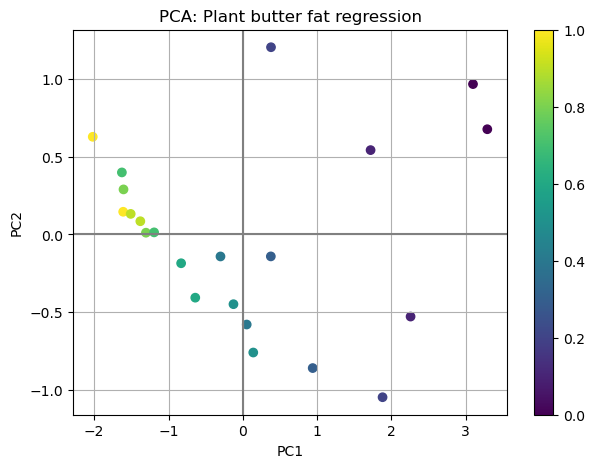

In [12]:
pca_plot(df_x_pca.values, df_y.values, title='Plant butter fat regression')

In [30]:
# import sklearn
# sklearn.metrics.get_scorer_names()

In [25]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x_pca, df_y, test_size=0.2, random_state=42)

# Cross validation
from sklearn.model_selection import cross_val_score

def cross_val(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    print(f'CV scores: {scores}')
    print(f'Mean CV score: {scores.mean()}')

# Linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
cross_val(model, X_train, y_train)

CV scores: [-0.01575326 -0.00929833 -0.0257763  -0.01037838 -0.008976  ]
Mean CV score: -0.01403645437452205


In [28]:
# Ridge regression
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
cross_val(model, X_train, y_train)

CV scores: [-0.01526038 -0.00969113 -0.0260312  -0.00767075 -0.0087656 ]
Mean CV score: -0.013483811675157067


In [29]:
# Print Ridge formula
print(f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x1 + {model.coef_[1]:.2f} * x2')

y = 0.49 + -0.17 * x1 + -0.03 * x2


In [27]:
# Lasso regression
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
cross_val(model, X_train, y_train)

CV scores: [-0.13860947 -0.08226331 -0.10129252 -0.09079932 -0.07319728]
Mean CV score: -0.09723237934226944


In [32]:
# Beta regression
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)
cross_val(model, X_train, y_train)


CV scores: [-0.01536385 -0.00956306 -0.02588013 -0.00866519 -0.00882718]
Mean CV score: -0.013659884174693725
